<a href="https://colab.research.google.com/github/felipesantana33/ASTOC_Mar-s/blob/main/Atividade_2_28_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

tsu = pd.read_csv('/content/imbituba.csv', delimiter=';')
tsu['datetime'] = tsu['dd/mm/aaaa '] + ' ' + tsu['hh:00 ']
tsu['datetime'] = pd.to_datetime(tsu['datetime'])
tsu.index = tsu['datetime']
tsu

dd/mm/aaaa   hh:00  obser   previ  nm168        \
datetime                                                              
2001-01-12 02:00:00  01/12/2001   02:00   2.045   1.817           0   
2001-01-12 03:00:00  01/12/2001   03:00   2.017   1.796           0   
2001-01-12 04:00:00  01/12/2001   04:00   1.947   1.727           0   
2001-01-12 05:00:00  01/12/2001   05:00   1.849   1.632           0   
2001-01-12 06:00:00  01/12/2001   06:00   1.735   1.523           0   
...                          ...     ...    ...     ...         ...   
2022-12-31 19:00:00  31/12/2022   19:00   1.669   1.689       1.523   
2022-12-31 20:00:00  31/12/2022   20:00   1.609   1.674       1.523   
2022-12-31 21:00:00  31/12/2022   21:00   1.610   1.641       1.523   
2022-12-31 22:00:00  31/12/2022   22:00   1.572   1.623       1.524   
2022-12-31 23:00:00  31/12/2022   23:00   1.611   1.618       1.525   

                               datetime  
datetime                                 
2001-01-12 02:00:00 2001-01-12 02:00:00  
2001-01-12 03:00:00 2001-01-12 03:00:00  
2001-01-12 04:00:00 2001-01-12 04:00:00  
2001-01-12 05:00:00 2001-01-12 05:00:00  
2001-01-12 06:00:00 2001-01-12 06:00:00  
...                                 ...  
2022-12-31 19:00:00 2022-12-31 19:00:00  
2022-12-31 20:00:00 2022-12-31 20:00:00  
2022-12-31 21:00:00 2022-12-31 21:00:00  
2022-12-31 22:00:00 2022-12-31 22:00:00  
2022-12-31 23:00:00 2022-12-31 23:00:00  

[184822 rows x 6 columns]

In [ ]:
tsu['obser '] = tsu['obser '].replace(r'^\s*$', np.nan, regex=True)

tsu['obser '] = tsu['obser '].astype(float)

In [ ]:
# Concatenate date and time columns
#df['tempo'] = df['dd/mm/aaaa '] + ' ' + df['hh:00 ']
datetime_range = pd.date_range(start='2001-12-01 02:00', end='2022-12-31 23:00', freq='H')
## Convert 'tempo' column to datetime format
tsu['tempo'] = pd.to_datetime(datetime_range)

tsu.index = tsu['tempo']

In [ ]:
tsu_sliced = tsu.loc['2008':'2009']

In [ ]:
tsu_sliced.index

<Axes: xlabel='data', ylabel='AVg Water Level [cm]'>

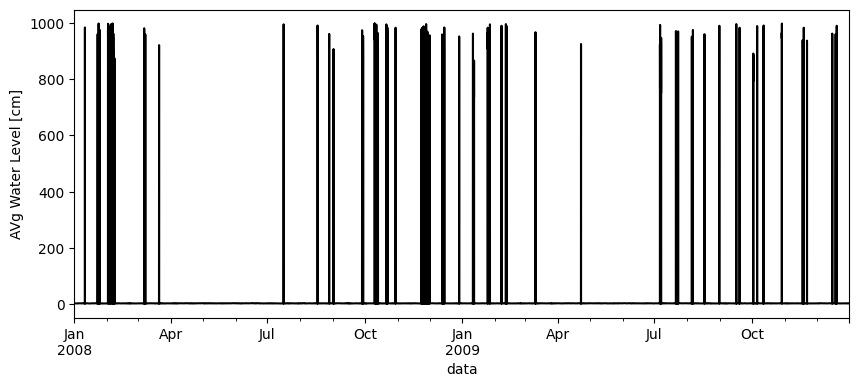

In [ ]:
tsu_sliced['obser '].plot(color='k',xlabel='data',ylabel='AVg Water Level [cm]',figsize=(10,4))

In [ ]:
tsu1 = tsu_sliced[tsu_sliced['obser ']<= 100]

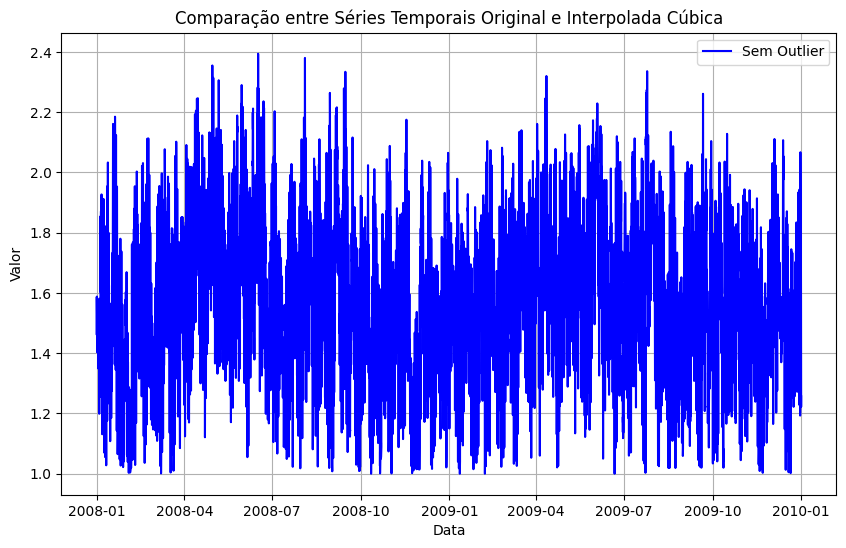

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Criando uma nova figura
plt.figure(figsize=(10, 6))

# Plotando a série temporal 'avg_water_l1'
#plt.plot(tsu_sliced.index,tsu_sliced['obser '], label='Original', color='blue')

# Plotando a série temporal 'avg_water_l1_cubic'
plt.plot(tsu1.index,tsu1['obser '], label='Sem Outlier', color='blue')

# Adicionando legendas e rótulos
plt.title('Comparação entre Séries Temporais Original e Interpolada Cúbica')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()

# Mostrar o gráfico
plt.grid(True)
plt.show()

<ipython-input-13-8cff294582aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsu1['obser_nearest'] = tsu1['obser '].interpolate(method='nearest')


<Axes: xlabel='data', ylabel='AVg Water Level [cm]'>

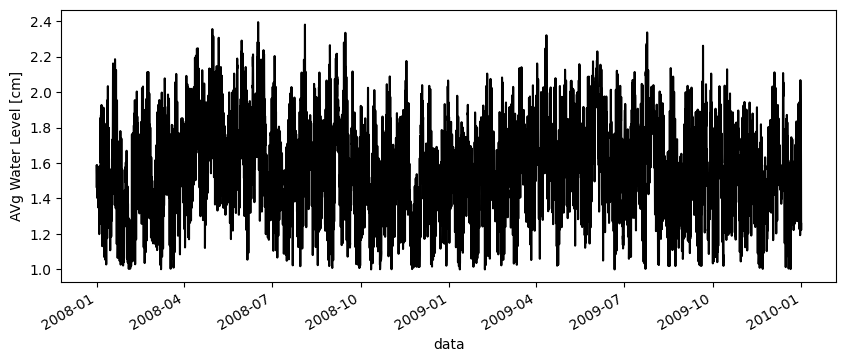

In [ ]:
tsu1['obser_nearest'] = tsu1['obser '].interpolate(method='nearest')
tsu1['obser_nearest'].plot(color='k',xlabel='data',ylabel='AVg Water Level [cm]',figsize=(10,4))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Realizando a decomposição sazonal da série temporal de SST
decomp = seasonal_decompose(tsu1['obser_nearest'], model='additive', period=365,two_sided=True)  # Ajuste o período conforme necessário

# Obtendo a componente sazonal
sazonal = decomp.seasonal

# Removendo a componente sazonal da série temporal de SST
no_season = tsu1['obser_nearest'] - sazonal

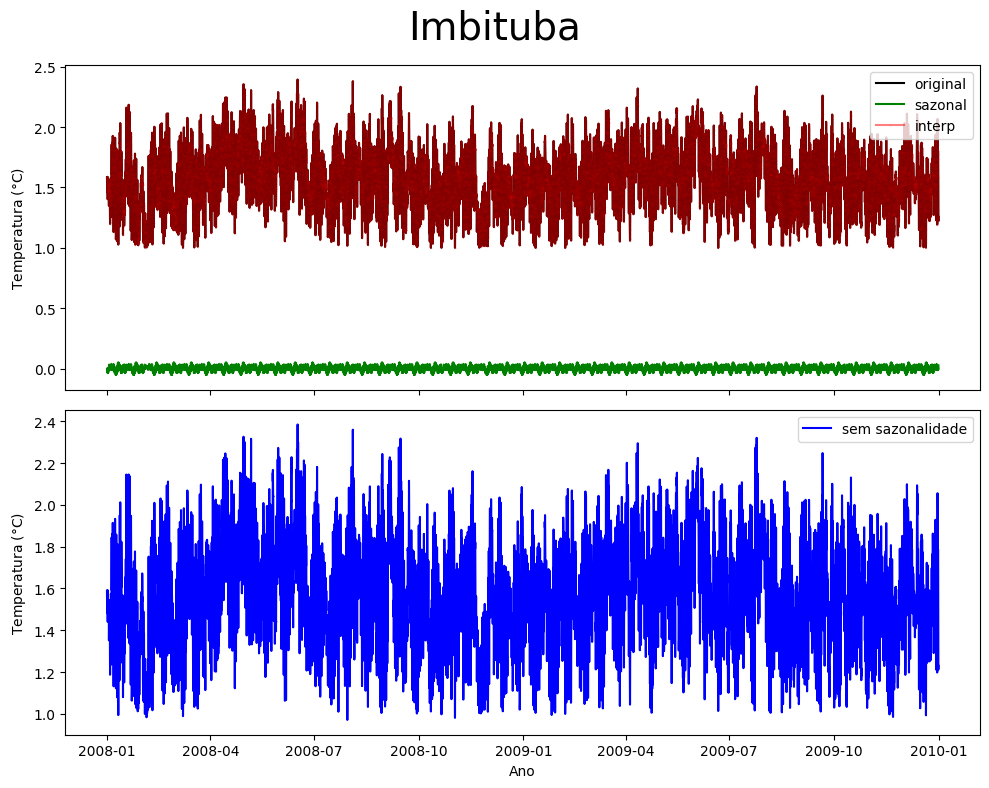

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Primeiro gráfico: SST original e interpolada
ax1.plot(tsu1['obser '], color='k', label='original')
ax1.plot(sazonal, color='g', label='sazonal')
ax1.plot(tsu1['obser_nearest'], marker='.', markersize=0.2, alpha=0.5, color='r', label='interp')
ax1.set_ylabel('Temperatura ($\degree$C)')
ax1.legend()

# Segundo gráfico: SST sem sazonalidade
ax2.plot(no_season, color='b', label='sem sazonalidade')
ax2.set_ylabel('Temperatura ($\degree$C)')
ax2.set_xlabel('Ano')
ax2.legend()

plt.suptitle('Imbituba', fontsize=28)
plt.tight_layout()
plt.show()

In [ ]:
tsu.obs_mean = tsu1['obser_nearest'] - tsu1['obser_nearest'].mean()
tsu.prev_mean =  tsu1['previ '] -  tsu1['previ '].mean()

<ipython-input-16-5486f628da86>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  tsu.obs_mean = tsu1['obser_nearest'] - tsu1['obser_nearest'].mean()
<ipython-input-16-5486f628da86>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  tsu.prev_mean =  tsu1['previ '] -  tsu1['previ '].mean()


In [ ]:
tsu1.meteo = tsu.obs_mean   - tsu.prev_mean

<ipython-input-17-c84afef443fe>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  tsu1.meteo = tsu.obs_mean   - tsu.prev_mean


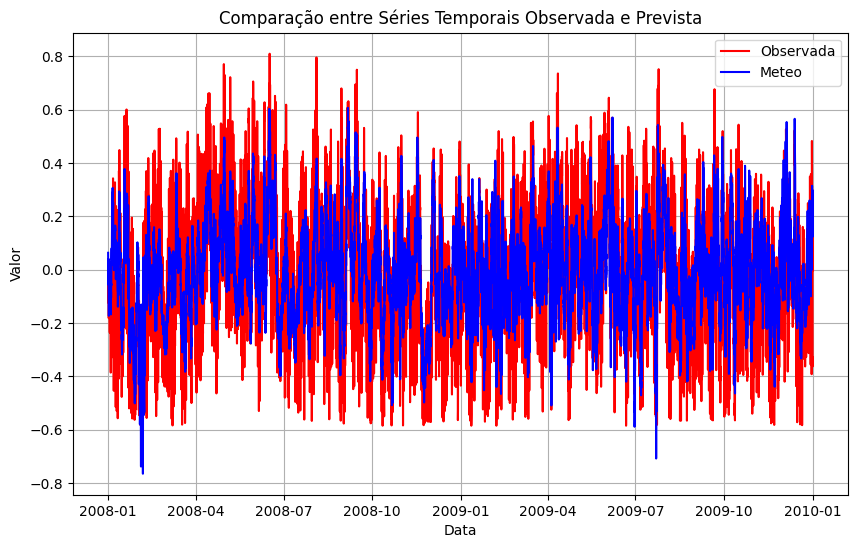

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Criando uma nova figura
plt.figure(figsize=(10, 6))


# Plotando a série temporal 'avg_water_l1_cubic'
plt.plot(tsu1.index, tsu.obs_mean, label='Observada', color='red')

# Plotando a série temporal 'avg_water_l1'
plt.plot(tsu1.index, tsu1.meteo, label='Meteo', color='blue')



# Adicionando legendas e rótulos
plt.title('Comparação entre Séries Temporais Observada e Prevista')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()

# Mostrar o gráfico
plt.grid(True)
plt.show()

In [ ]:
import statsmodels.api as sm


In [ ]:
acf_values = sm.tsa.acf(tsu1.meteo)

In [ ]:
print(acf_values)

[1.         0.97672211 0.94140107 0.90820516 0.87674479 0.8523846
 0.83524211 0.82189515 0.81260454 0.81245802 0.81476096 0.81081271
 0.79692497 0.77020119 0.73116752 0.68596791 0.64248676 0.60667557
 0.58051504 0.56004244 0.54577975 0.53783307 0.53405573 0.53249029
 0.52617904 0.50298425 0.4642497  0.42122832 0.38112567 0.34921245
 0.32711533 0.3124438  0.30160439 0.29671514 0.29723147 0.29739091
 0.29333015 0.28159936 0.25966046 0.23090532 0.20247117 0.1793118
 0.16515391]


In [ ]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

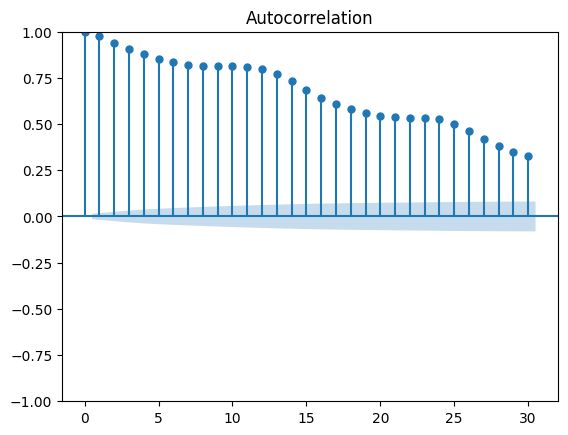

In [ ]:
fig = tsaplots.plot_acf(tsu1.meteo, lags=30)  # Adjust the number of lags as needed
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller


def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [ ]:
adf_test(tsu1.meteo)

Results of Dickey-Fuller Test:
Test Statistic                -1.209129e+01
p-value                        2.119700e-22
#Lags Used                     4.400000e+01
Number of Observations Used    1.724200e+04
Critical Value (1%)           -3.430729e+00
Critical Value (5%)           -2.861708e+00
Critical Value (10%)          -2.566859e+00
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import kpss


def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [ ]:
kpss_test(tsu1.meteo)

Results of KPSS Test:
Test Statistic            0.108394
p-value                   0.100000
Lags Used                75.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


<ipython-input-103-d9d54c2c040c>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression="c", nlags="auto")


In [ ]:
# primeiro instalando o waipy da Mabel Calim (ex-INPE) https://github.com/mabelcalim/waipy
!pip install git+https://github.com/mabelcalim/waipy.git

  Cloning https://github.com/mabelcalim/waipy.git to /tmp/pip-req-build-7k8qbkgw
  Running command git clone --filter=blob:none --quiet https://github.com/mabelcalim/waipy.git /tmp/pip-req-build-7k8qbkgw
  Resolved https://github.com/mabelcalim/waipy.git to commit bcba7430fb7f0de5f6732f74634d9ac11ebb380a
  Preparing metadata (setup.py) ... done
  Created wheel for waipy: filename=waipy-0.1.51-py3-none-any.whl size=16785 sha256=bb5fd451c1a74ecca8719240f7b539b7ad904505be743d99a559c71d90ee2f42
  Stored in directory: /tmp/pip-ephem-wheel-cache-2__i937b/wheels/f8/07/b3/16b9aadb5a38edfae4b1f0a5b26cb78eaf6e60bc9499c31410
Successfully built waipy


In [ ]:
import waipy
data_norm = waipy.normalize(tsu1.meteo)

In [ ]:
data_string = "2008-01-01 00:00:00"

# Converter a string em um objeto Timestamp
data_timestamp = pd.Timestamp(data_string)

data_timestamp

ano_decimal = data_timestamp.year + data_timestamp.dayofyear / 365.25

data_timestamp.year

2008

In [ ]:
# Obter o ano decimal
ano_decimal = tsu1.index.year + tsu1.index.day / 365.25

print(f"Ano decimal correspondente à data {data_string}: {ano_decimal:.4f}")

TypeError: unsupported format string passed to Float64Index.__format__

In [ ]:
 tsu1['decyear'] = (tsu1.index.year + tsu1.index.month/12 + tsu1.index.day/365.25 +tsu1.index.hour/(365.25*24) )

<ipython-input-106-5cf45e6cede2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsu1['decyear'] = (tsu1.index.year + tsu1.index.month/12 + tsu1.index.day/365.25 +tsu1.index.hour/(365.25*24) )


In [ ]:
tsu1

dd/mm/aaaa   hh:00   obser   previ  nm168        \
tempo                                                                  
2008-01-01 00:00:00  01/01/2008   00:00    1.584   1.548           0   
2008-01-01 01:00:00  01/01/2008   01:00    1.554   1.533           0   
2008-01-01 02:00:00  01/01/2008   02:00    1.501   1.518           0   
2008-01-01 03:00:00  01/01/2008   03:00    1.465   1.517           0   
2008-01-01 04:00:00  01/01/2008   04:00    1.461   1.534           0   
...                          ...     ...     ...     ...         ...   
2009-12-31 18:00:00  31/12/2009   18:00    1.583   1.329           0   
2009-12-31 19:00:00  31/12/2009   19:00    1.451   1.180           0   
2009-12-31 20:00:00  31/12/2009   20:00    1.315   1.058           0   
2009-12-31 21:00:00  31/12/2009   21:00    1.222   1.044           0   
2009-12-31 22:00:00  31/12/2009   22:00    1.257   1.159           0   

                               datetime               tempo  obser_nearest  \
tempo                                                                        
2008-01-01 00:00:00 2008-01-01 00:00:00 2008-01-01 00:00:00          1.584   
2008-01-01 01:00:00 2008-01-01 01:00:00 2008-01-01 01:00:00          1.554   
2008-01-01 02:00:00 2008-01-01 02:00:00 2008-01-01 02:00:00          1.501   
2008-01-01 03:00:00 2008-01-01 03:00:00 2008-01-01 03:00:00          1.465   
2008-01-01 04:00:00 2008-01-01 04:00:00 2008-01-01 04:00:00          1.461   
...                                 ...                 ...            ...   
2009-12-31 18:00:00 2009-12-31 18:00:00 2009-12-31 18:00:00          1.583   
2009-12-31 19:00:00 2009-12-31 19:00:00 2009-12-31 19:00:00          1.451   
2009-12-31 20:00:00 2009-12-31 20:00:00 2009-12-31 20:00:00          1.315   
2009-12-31 21:00:00 2009-12-31 21:00:00 2009-12-31 21:00:00          1.222   
2009-12-31 22:00:00 2009-12-31 22:00:00 2009-12-31 22:00:00          1.257   

                         decyear  
tempo                             
2008-01-01 00:00:00  2008.086071  
2008-01-01 01:00:00  2008.086185  
2008-01-01 02:00:00  2008.086299  
2008-01-01 03:00:00  2008.086413  
2008-01-01 04:00:00  2008.086527  
...                          ...  
2009-12-31 18:00:00  2010.086927  
2009-12-31 19:00:00  2010.087041  
2009-12-31 20:00:00  2010.087155  
2009-12-31 21:00:00  2010.087269  
2009-12-31 22:00:00  2010.087383  

[17287 rows x 9 columns]

In [ ]:
import waipy
data_norm = waipy.normalize(tsu1['obser_nearest'])

In [ ]:
# **NOTE** a receita de bolo.....
T1 = tsu1.decyear[0] # define o início da série aqui
time = tsu1.decyear
dt = 1 #

pad = 0         # preencha a série temporal com zeros (recomendado)
dj = 0.5       # isto fará 4 sub-oitavas por oitava
s0 = 1*dt       # isso diz começar em uma escala de 6 meses se dt = mensal
j1 = 8/dj       # isso diz fazer 7 potências de dois com dj sub-oitavas cada
lag1 = 0     # lag-1 autocorrelação para ruído de fundo vermelho
param = 6
mother = 'Morlet'

Nr of Scales: 28
scales [1.0, 1.4142135623730951, 2.0, 2.8284271247461903, 4.0, 5.656854249492381, 8.0, 11.313708498984761, 16.0, 22.627416997969522, 32.0, 45.254833995939045, 64.0, 90.50966799187809, 128.0, 181.01933598375618, 256.0, 362.03867196751236, 512.0, 724.0773439350247, 1024.0, 1448.1546878700494, 2048.0, 2896.309375740099, 4096.0, 5792.618751480198, 8192.0, 11585.237502960395, 16384.0]


{'fig': <Figure size 4500x3000 with 5 Axes>,
 'ax_data': <Axes: title={'center': 'Observado - Previsto'}, ylabel='Amplitude'>,
 'ax_cwt': <Axes: xlabel='Time', ylabel='Period'>,
 'ax_wavelet': <Axes: title={'center': '$\\psi$ (t/s) Morlet in time domain'}, xlabel='Time', ylabel='Amplitude'>,
 'ax_global_spectrum': <Axes: title={'center': 'Global Wavelet Spectrum'}, xlabel='Power'>}

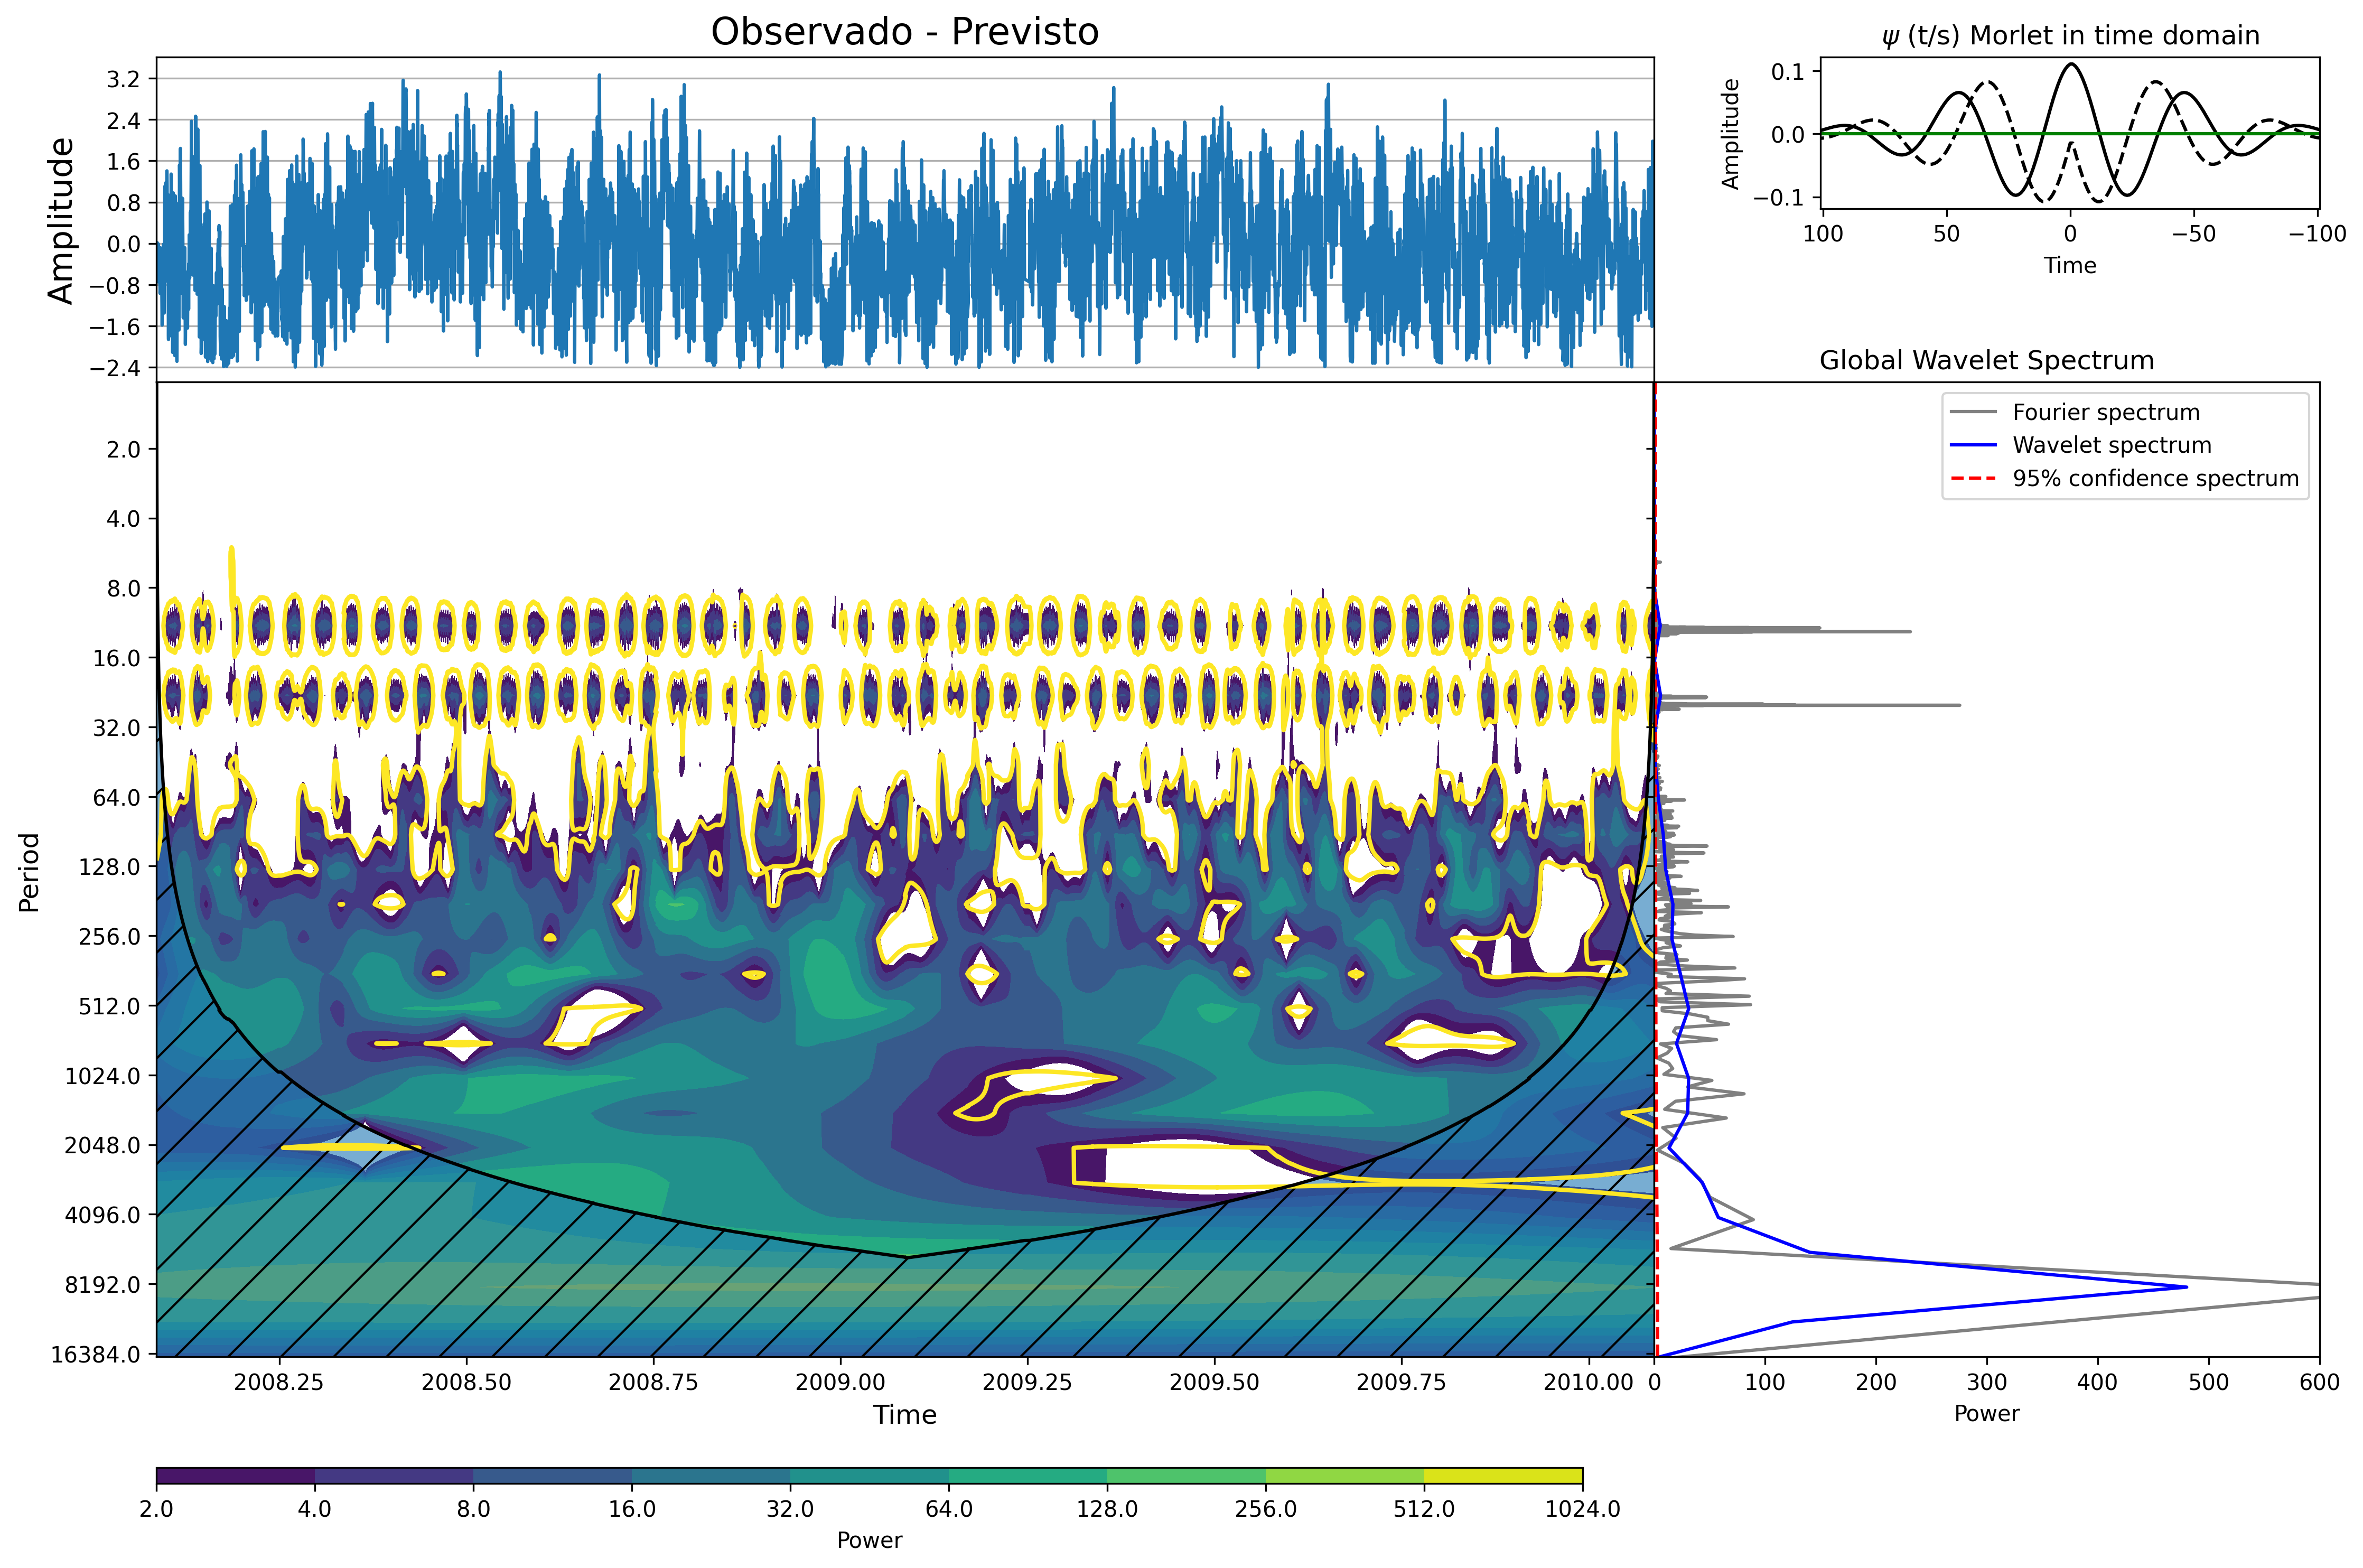

In [ ]:
result_sun = waipy.cwt(data_norm, dt, pad, dj, s0, j1, lag1, param, mother='Morlet',name='Solar win=13m')
var='Observado'
dtmin = 1    # dt/n of suboctaves
waipy.wavelet_plot(var, time, data_norm, dtmin, result_sun)

In [ ]:
import waipy
data_norm = waipy.normalize(tsu1['previ '])

In [ ]:
# **NOTE** a receita de bolo.....
T1 = tsu1.decyear[0] # define o início da série aqui
time = tsu1.decyear
dt = 1 #

pad = 0         # preencha a série temporal com zeros (recomendado)
dj = 0.5       # isto fará 4 sub-oitavas por oitava
s0 = 1*dt       # isso diz começar em uma escala de 6 meses se dt = mensal
j1 = 8/dj       # isso diz fazer 7 potências de dois com dj sub-oitavas cada
lag1 = 0     # lag-1 autocorrelação para ruído de fundo vermelho
param = 6
mother = 'Morlet'

Nr of Scales: 28
scales [1.0, 1.4142135623730951, 2.0, 2.8284271247461903, 4.0, 5.656854249492381, 8.0, 11.313708498984761, 16.0, 22.627416997969522, 32.0, 45.254833995939045, 64.0, 90.50966799187809, 128.0, 181.01933598375618, 256.0, 362.03867196751236, 512.0, 724.0773439350247, 1024.0, 1448.1546878700494, 2048.0, 2896.309375740099, 4096.0, 5792.618751480198, 8192.0, 11585.237502960395, 16384.0]


{'fig': <Figure size 4500x3000 with 5 Axes>,
 'ax_data': <Axes: title={'center': 'Observado'}, ylabel='Amplitude'>,
 'ax_cwt': <Axes: xlabel='Time', ylabel='Period'>,
 'ax_wavelet': <Axes: title={'center': '$\\psi$ (t/s) Morlet in time domain'}, xlabel='Time', ylabel='Amplitude'>,
 'ax_global_spectrum': <Axes: title={'center': 'Global Wavelet Spectrum'}, xlabel='Power'>}

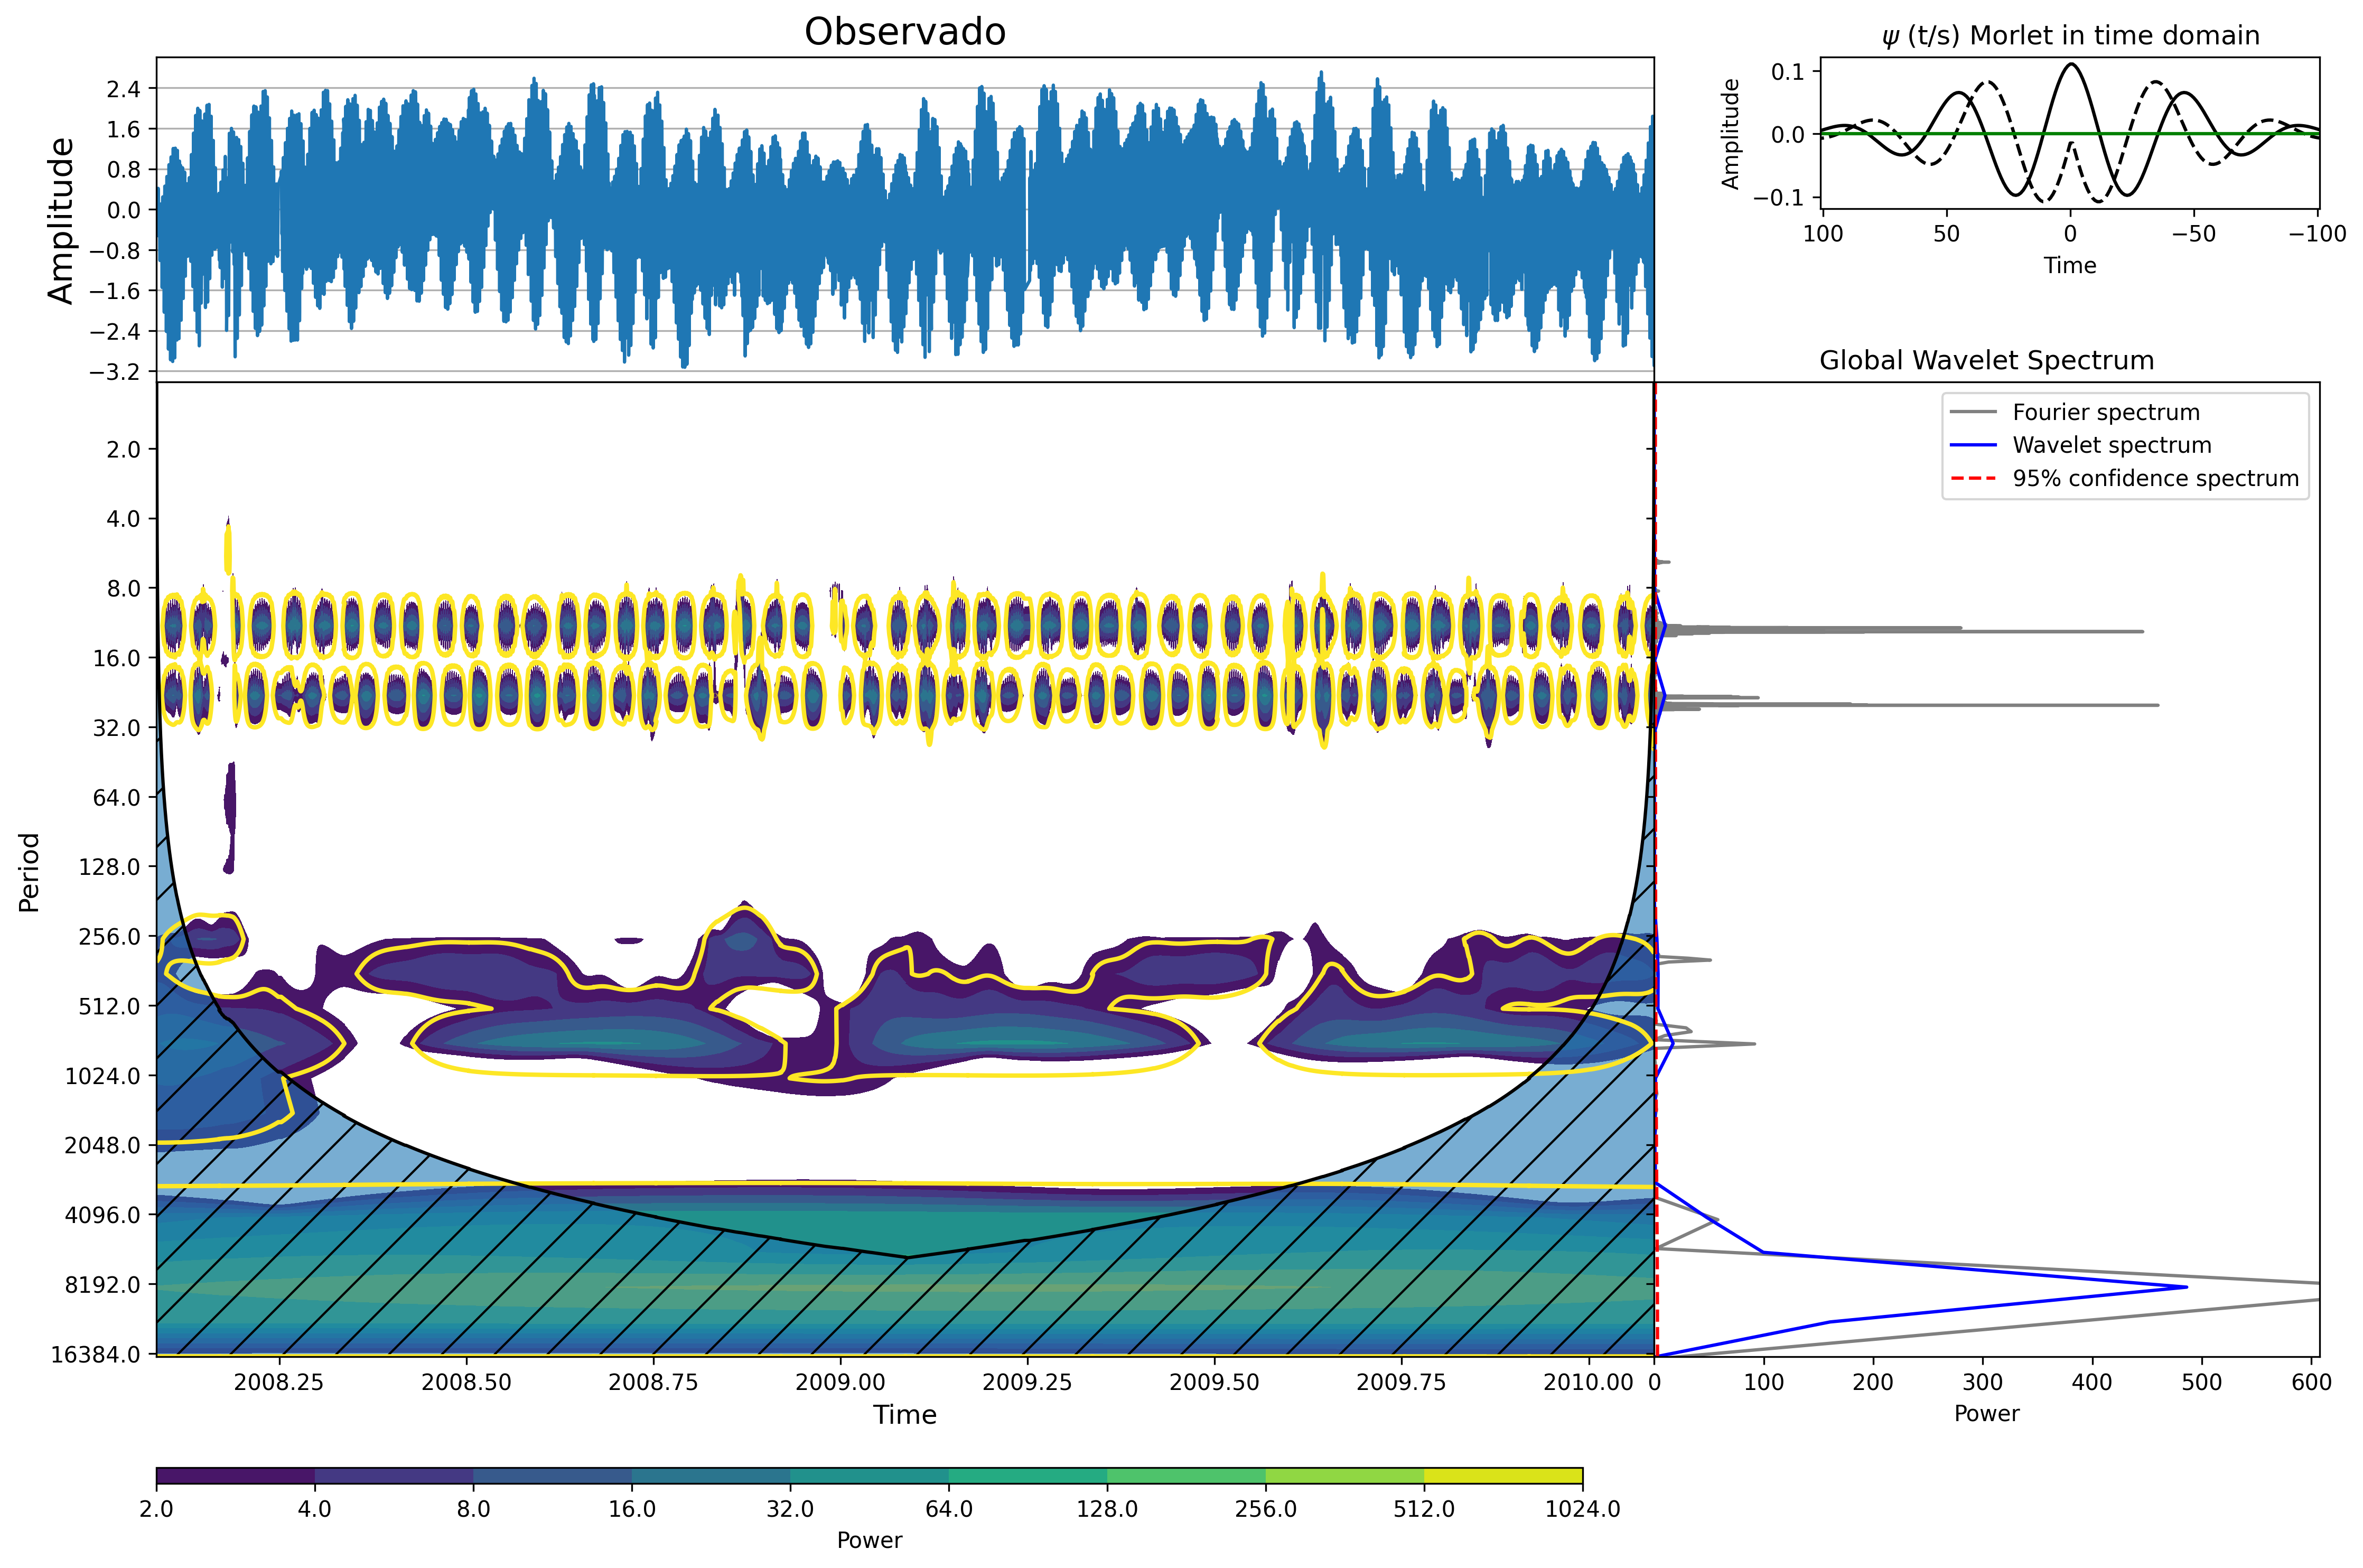

In [ ]:
result_sun = waipy.cwt(data_norm, dt, pad, dj, s0, j1, lag1, param, mother='Morlet',name='Solar win=13m')
var='Observado'
dtmin = 1    # dt/n of suboctaves
waipy.wavelet_plot(var, time, data_norm, dtmin, result_sun)

In [ ]:
import waipy
data_norm = waipy.normalize(tsu1.meteo)

In [ ]:
T1 = tsu1.decyear[0] # define o início da série aqui
time = tsu1.decyear
dt = 1 #

pad = 0         # preencha a série temporal com zeros (recomendado)
dj = 0.5       # isto fará 4 sub-oitavas por oitava
s0 = 1*dt       # isso diz começar em uma escala de 6 meses se dt = mensal
j1 = 8/dj       # isso diz fazer 7 potências de dois com dj sub-oitavas cada
lag1 = 0     # lag-1 autocorrelação para ruído de fundo vermelho
param = 6
mother = 'Morlet'

Nr of Scales: 28
scales [1.0, 1.4142135623730951, 2.0, 2.8284271247461903, 4.0, 5.656854249492381, 8.0, 11.313708498984761, 16.0, 22.627416997969522, 32.0, 45.254833995939045, 64.0, 90.50966799187809, 128.0, 181.01933598375618, 256.0, 362.03867196751236, 512.0, 724.0773439350247, 1024.0, 1448.1546878700494, 2048.0, 2896.309375740099, 4096.0, 5792.618751480198, 8192.0, 11585.237502960395, 16384.0]


{'fig': <Figure size 4500x3000 with 5 Axes>,
 'ax_data': <Axes: title={'center': 'Observado'}, ylabel='Amplitude'>,
 'ax_cwt': <Axes: xlabel='Time', ylabel='Period'>,
 'ax_wavelet': <Axes: title={'center': '$\\psi$ (t/s) Morlet in time domain'}, xlabel='Time', ylabel='Amplitude'>,
 'ax_global_spectrum': <Axes: title={'center': 'Global Wavelet Spectrum'}, xlabel='Power'>}

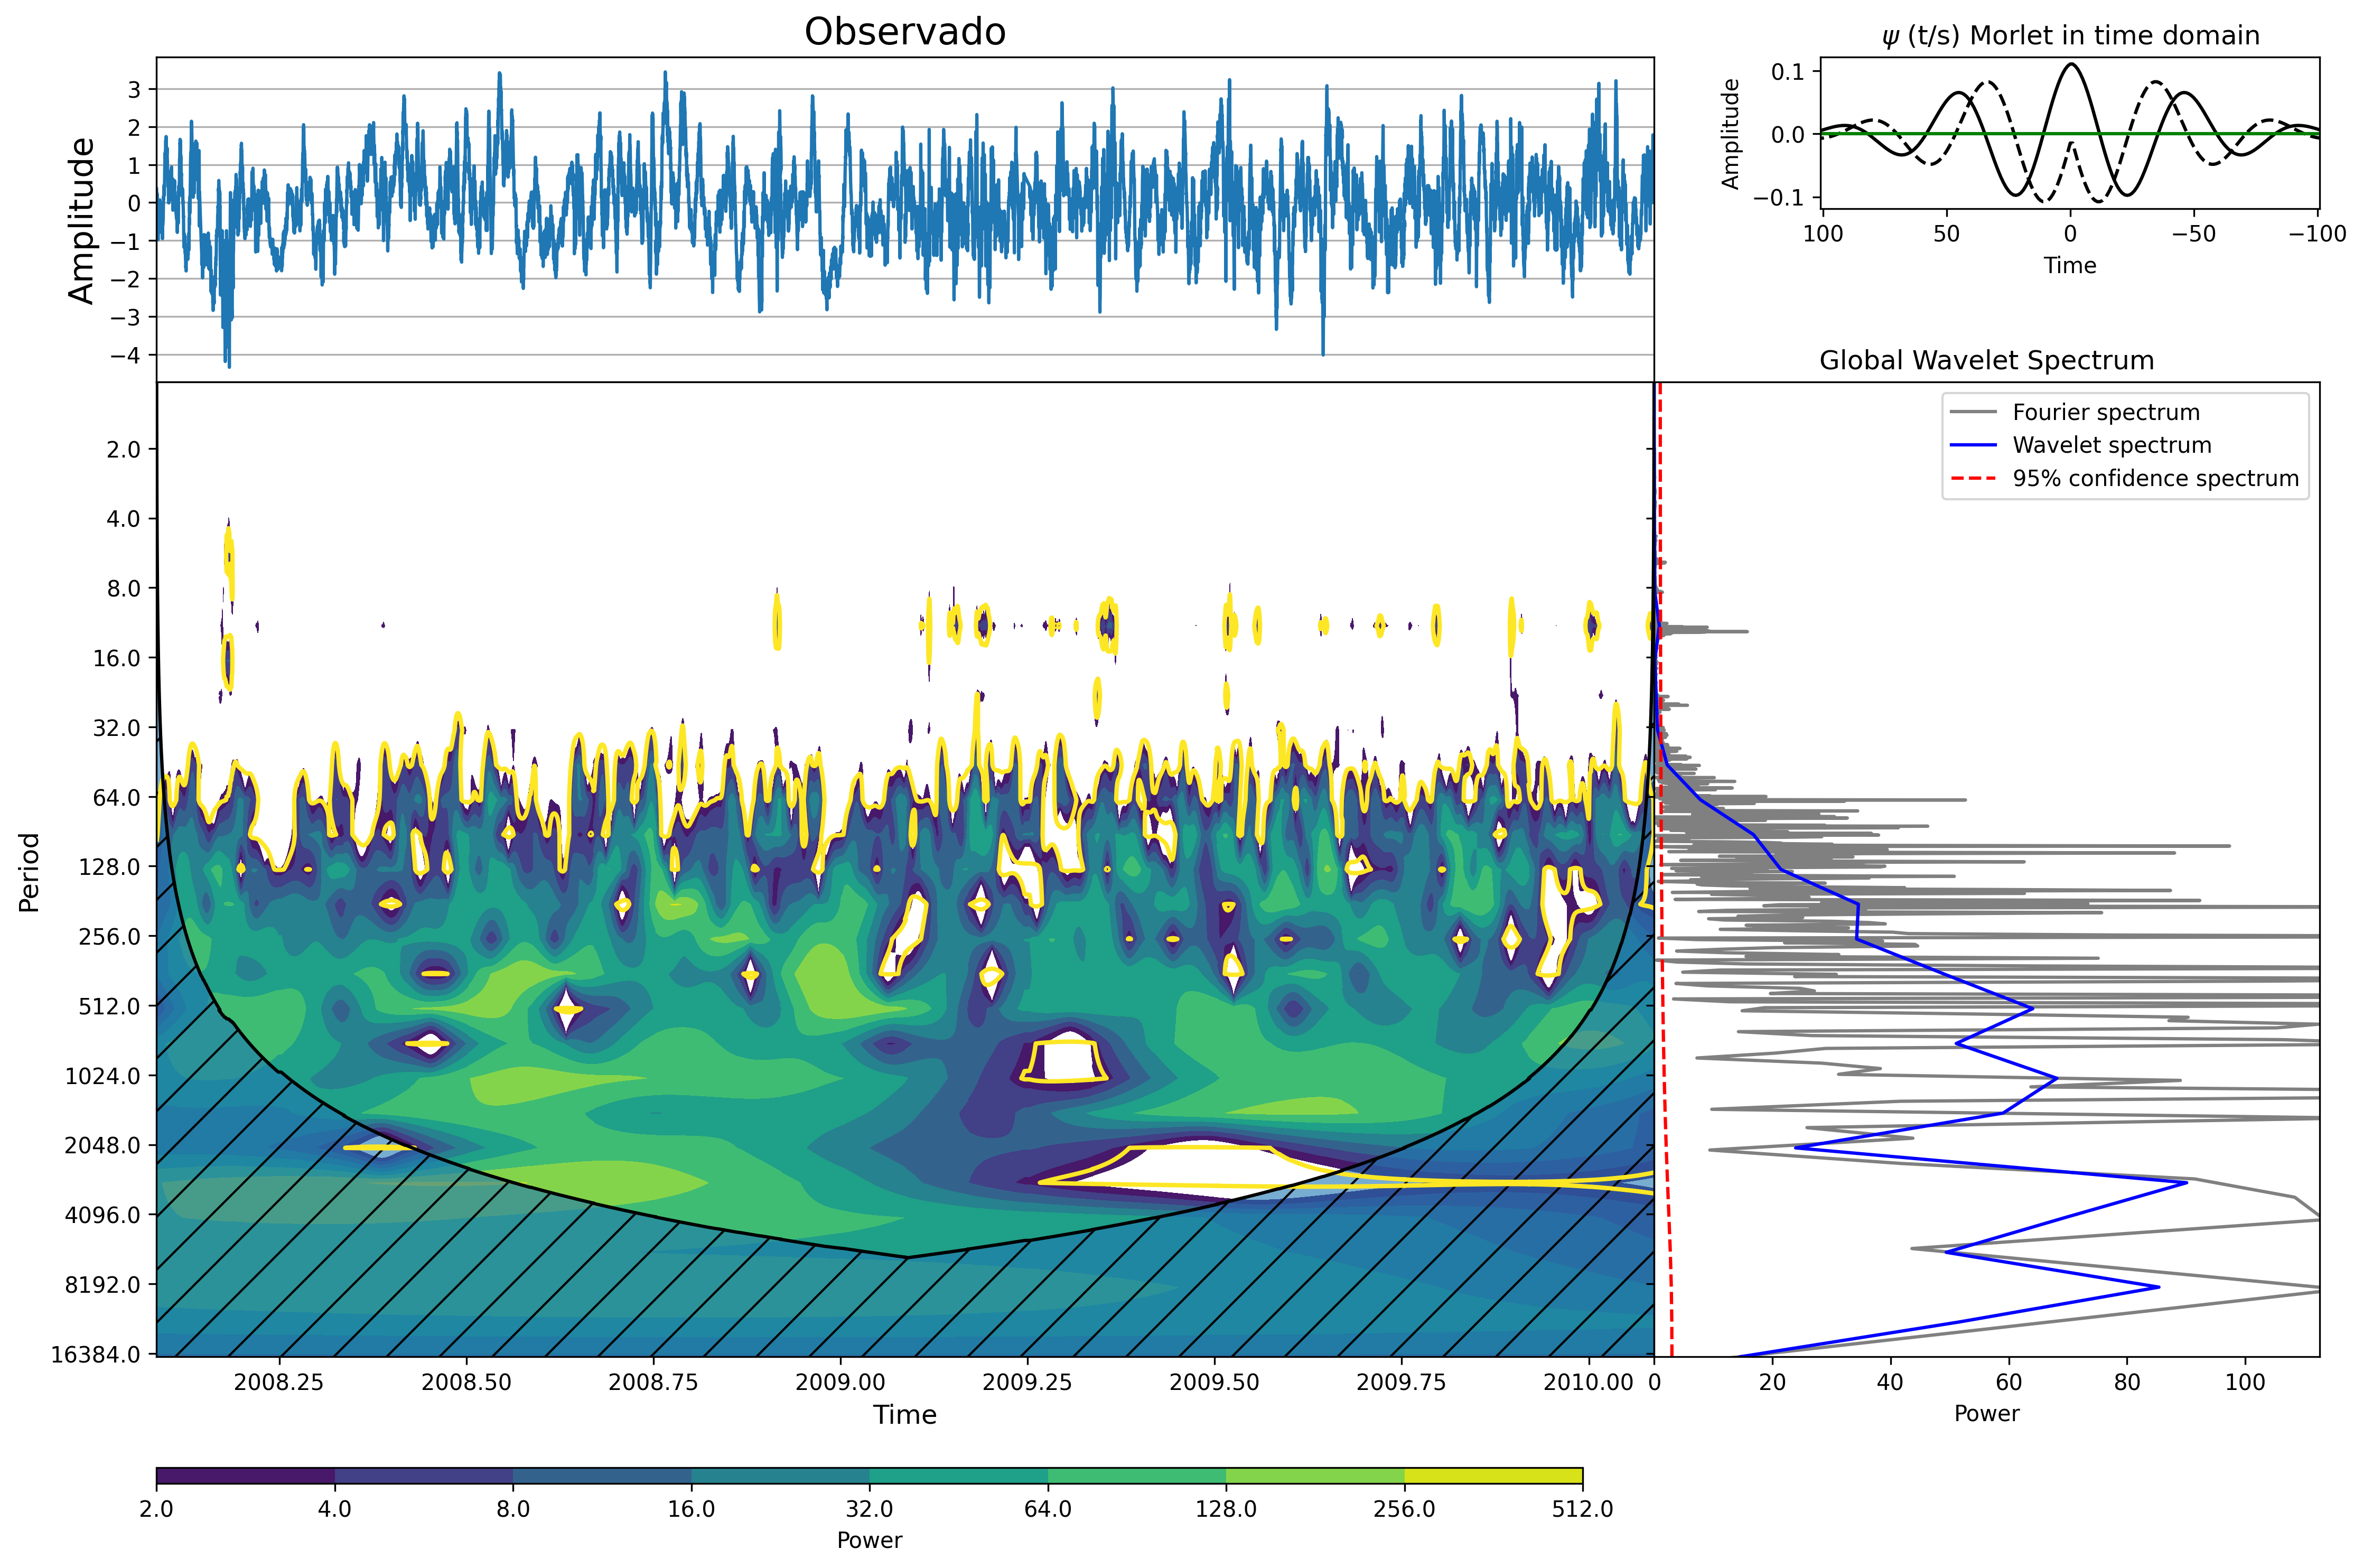

In [ ]:
result_sun = waipy.cwt(data_norm, dt, pad, dj, s0, j1, lag1, param, mother='Morlet',name='Solar win=13m')
var='Observado - PRevisto'
dtmin = 1    # dt/n of suboctaves
waipy.wavelet_plot(var, time, data_norm, dtmin, result_sun)

In [ ]:
https://colab.research.google.com/drive/1K1gg0tdVRTe0LMOjnXQ40GX9R1MT64au?usp=sharing